In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")
print(df.head())
print(df.info())
print(df.dtypes)

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
X1    float64
X2    flo

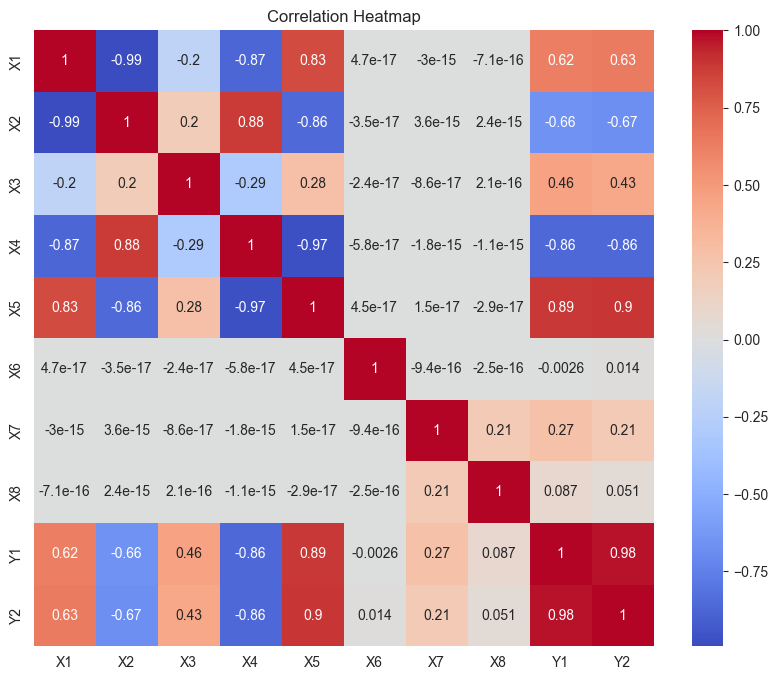

In [3]:
plt.figure(figsize = (10, 8))
correlations = df.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Training a linear regression model

In [4]:
import statsmodels.api as sm

columns = df.columns
y1 = df['Y1']
y2 = df['Y2']
x = df[columns[:-2]]
x = sm.add_constant(x)
model1 = sm.OLS(y1.astype(float), x.astype(float)).fit()
model2 = sm.OLS(y2.astype(float), x.astype(float)).fit()

### Calcuate Cook's distance

In [5]:
np.set_printoptions(suppress=True)

# get cook's distance score
influence1 = model1.get_influence()
influence2 = model2.get_influence()

cooks1 = influence1.cooks_distance
cooks2 = influence2.cooks_distance
# print(cooks)

### Visualize the cook's distance and find influencial points

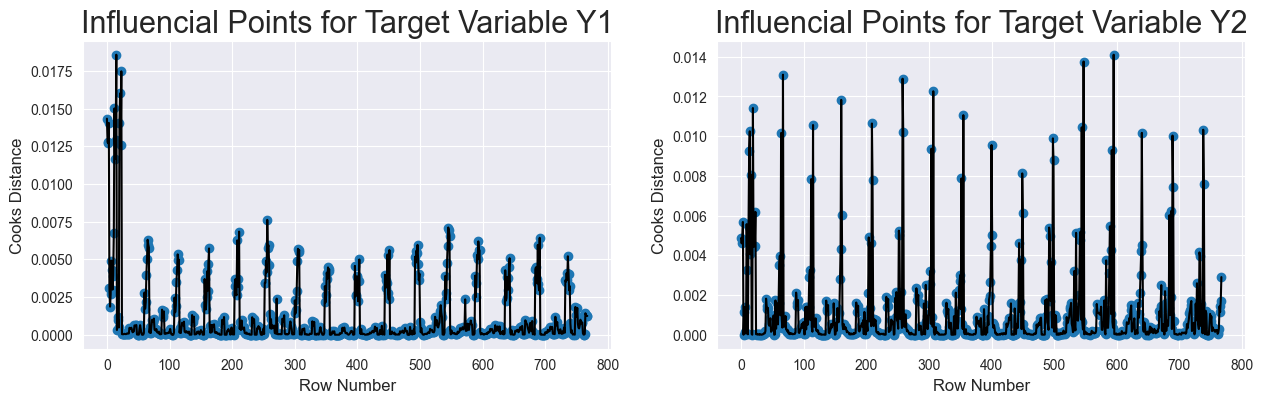

In [6]:
# Draw plot
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.scatter(df.index, cooks1[0])
plt.plot(df.index, cooks1[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points for Target Variable Y1', fontsize = 22)

plt.subplot(1,2,2)
plt.scatter(df.index, cooks2[0])
plt.plot(df.index, cooks2[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points for Target Variable Y2', fontsize = 22)
plt.show()

#### Mean Cook's distance

In [7]:
mean_cooks1 = np.mean(cooks1[0])
mean_cooks2 = np.mean(cooks2[0])
print(mean_cooks1)
print(mean_cooks2)

0.0011295231659898045
0.0010867134265917357


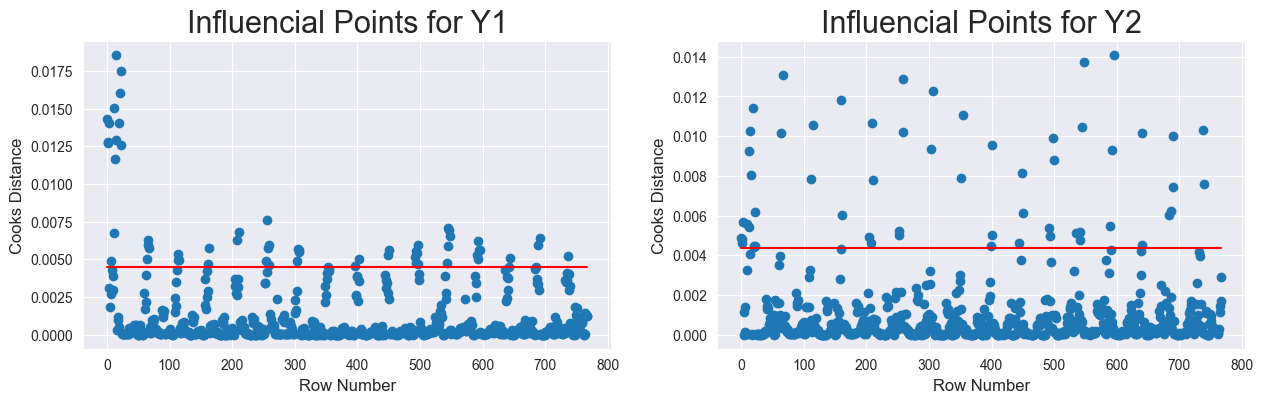

In [8]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.scatter(df.index, cooks1[0])
plt.plot(df.index, [4*mean_cooks1 for i in df.index], color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points for Y1', fontsize = 22)

plt.subplot(1,2,2)
plt.scatter(df.index, cooks2[0])
plt.plot(df.index, [4*mean_cooks2 for i in df.index], color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points for Y2', fontsize = 22)
plt.show()

In [9]:
print('\nInfluencial points for y1\n')
influencial_points1 = df.index[cooks1[0] > 4*mean_cooks1]
print(f'Number of Influencial points for Y1 is {len(influencial_points1)}\n')
(df.iloc[influencial_points1, :])


Influencial points for y1

Number of Influencial points for Y1 is 58



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.00,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.00,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.00,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.00,0,15.55,21.33
7,0.90,563.5,318.5,122.50,7.0,5,0.00,0,19.68,29.60
11,0.86,588.0,294.0,147.00,7.0,5,0.00,0,18.31,27.87
12,0.82,612.5,318.5,147.00,7.0,2,0.00,0,17.05,23.77
13,0.82,612.5,318.5,147.00,7.0,3,0.00,0,17.41,21.46
14,0.82,612.5,318.5,147.00,7.0,4,0.00,0,16.95,21.16
15,0.82,612.5,318.5,147.00,7.0,5,0.00,0,15.98,24.93


In [10]:
print('\nInfluencial points for Y2\n')
influencial_points2 = df.index[cooks2[0] > 4*mean_cooks2]
print(f'Number of Influencial points for Y2 is {len(influencial_points2)}\n')
df.iloc[influencial_points2, :]


Influencial points for Y2

Number of Influencial points for Y2 is 58



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.00,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.00,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.00,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.00,0,15.55,21.33
9,0.86,588.0,294.0,147.00,7.0,3,0.00,0,19.95,21.97
12,0.82,612.5,318.5,147.00,7.0,2,0.00,0,17.05,23.77
13,0.82,612.5,318.5,147.00,7.0,3,0.00,0,17.41,21.46
14,0.82,612.5,318.5,147.00,7.0,4,0.00,0,16.95,21.16
16,0.79,637.0,343.0,147.00,7.0,2,0.00,0,28.52,37.73
19,0.79,637.0,343.0,147.00,7.0,5,0.00,0,28.75,39.44


### Visualizing leverage points

Since leverage points is outlier in X variables which means it doesn't depends on how many target variables are there.So, in this dataset even though we have 2 target variable Y1 and Y2, analysis for leverage points is singular only.

In [11]:
lev = influence1.hat_matrix_diag
lev2 = influence2.hat_matrix_diag

if lev.all() == lev2.all():
    print('It can be seen clearly, leverage is same for all data points and doesn\'t depend on number of target varibales')
else:
    print('Leverage is not same')

It can be seen clearly, leverage is same for all data points and doesn't depend on number of target varibales


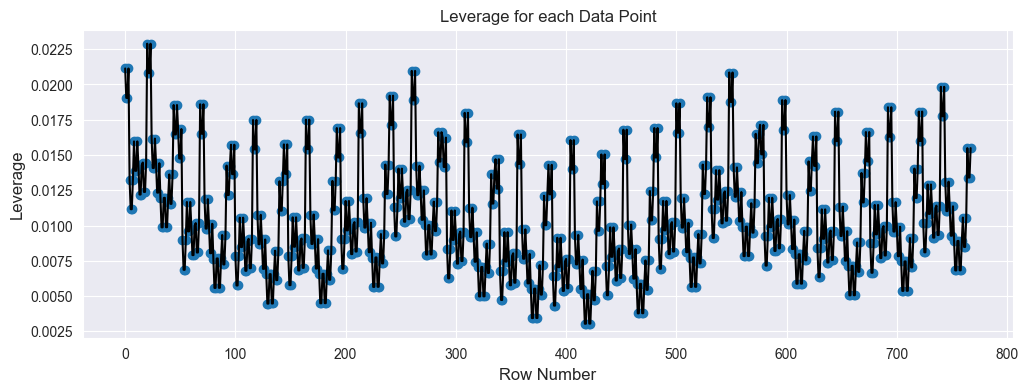

In [12]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

#### Mean Leverage
The rows which have leverage greater than 2x of mean leverage are taken as leverage points

In [13]:
mean_lev = np.mean(lev)
mean_lev_list = [2*mean_lev for i in df.index]

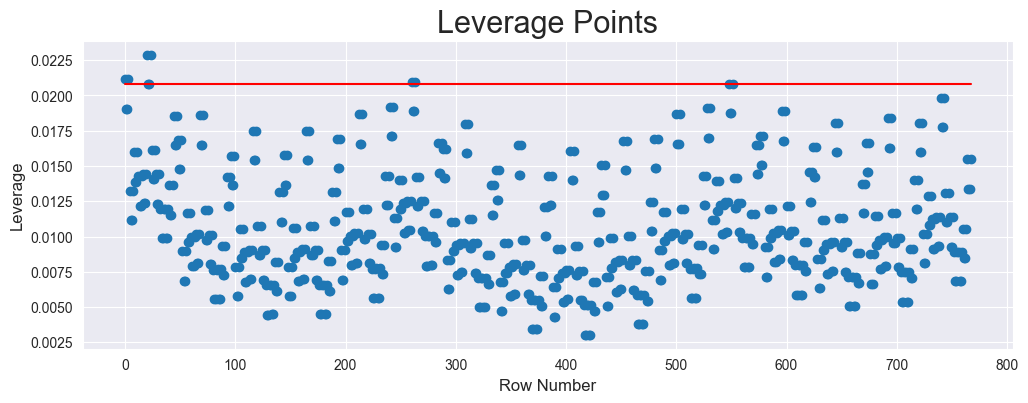

In [14]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, mean_lev_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage Points', fontsize = 22)
plt.show()

In [15]:
leverage_points = df.index[lev > (2 * mean_lev)]
print("LEVERAGE POINTS")
df.iloc[leverage_points, :]

LEVERAGE POINTS


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
20,0.76,661.5,416.5,122.50,7.0,2,0.0,0,24.77,29.79
23,0.76,661.5,416.5,122.50,7.0,5,0.0,0,23.93,29.40
260,0.76,661.5,416.5,122.50,7.0,2,0.1,5,32.31,34.25
263,0.76,661.5,416.5,122.50,7.0,5,0.1,5,33.27,33.88
548,0.76,661.5,416.5,122.50,7.0,2,0.4,1,40.78,39.55
551,0.76,661.5,416.5,122.50,7.0,5,0.4,1,40.43,39.48


### Visualizing Outliers using residual

In [16]:
residuals1 = np.abs(model1.resid)
residuals2 = np.abs(model2.resid)

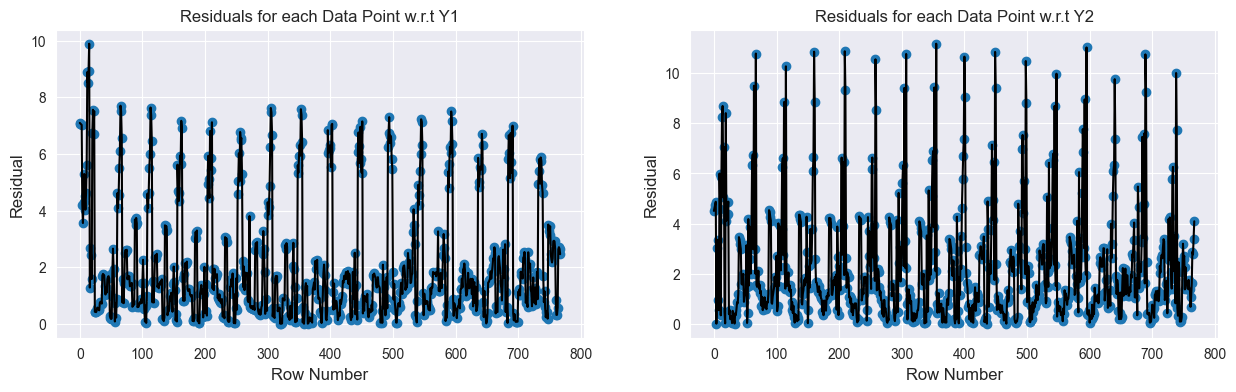

In [17]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.scatter(df.index, residuals1)
plt.plot(df.index, residuals1, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point w.r.t Y1')

plt.subplot(1,2,2)
plt.scatter(df.index, residuals2)
plt.plot(df.index, residuals2, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point w.r.t Y2')
plt.show()

#### Mean residual distance

In [18]:
mean_res1 = np.mean(residuals1)
mean_res2 = np.mean(residuals2)
print(f'Mean1: {mean_res1}\nMean2: {mean_res2}')

Mean1: 2.066876848948087
Mean2: 2.242445374650242


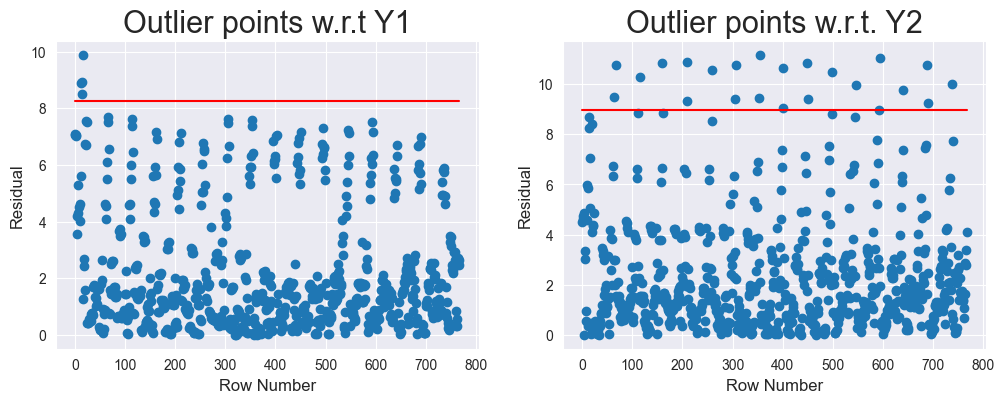

In [19]:
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.scatter(df.index, residuals1)
plt.plot(df.index, [mean_res1*4 for i in df.index], color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Outlier points w.r.t Y1', fontsize = 22)

plt.subplot(1,2,2)
plt.scatter(df.index, residuals2)
plt.plot(df.index, [mean_res2*4 for i in df.index], color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Outlier points w.r.t. Y2', fontsize = 22)
plt.show()

In [20]:
outlier_points1 = df.index[residuals1 > (mean_res1*2)]
print("OUTLIER POINTS w.r.t Y1")
df.iloc[outlier_points1, :]

OUTLIER POINTS w.r.t Y1


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
735,0.82,612.5,318.5,147.00,7.0,5,0.4,5,29.92,32.54
736,0.79,637.0,343.0,147.00,7.0,2,0.4,5,42.11,38.56
737,0.79,637.0,343.0,147.00,7.0,3,0.4,5,41.96,37.70
738,0.79,637.0,343.0,147.00,7.0,4,0.4,5,41.09,47.01


In [21]:
outlier_points2 = df.index[residuals2 > (mean_res2*2)]
print("OUTLIER POINTS w.r.t Y2")
print(f'Number of Outliers is {len(outlier_points2)}')
df.iloc[outlier_points2, :]

OUTLIER POINTS w.r.t Y2
Number of Outliers is 91


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97
...,...,...,...,...,...,...,...,...,...,...
690,0.79,637.0,343.0,147.00,7.0,4,0.4,4,41.32,46.23
732,0.82,612.5,318.5,147.00,7.0,2,0.4,5,30.00,29.93
733,0.82,612.5,318.5,147.00,7.0,3,0.4,5,29.50,29.56
738,0.79,637.0,343.0,147.00,7.0,4,0.4,5,41.09,47.01
